<a href="https://colab.research.google.com/github/sakhalkarurvi/-AI-CEO-Startup-Investment-Decision-Predictor/blob/main/AI_CEO_Startup_Investment_Decision_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1 : Load dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/startup_funding.csv')

# Basic structure
print("\n--- Dataset Info ---")
print(df.info())

# Preview first 10 rows
print("\n--- Sample Data ---")
print(df.head(10))



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None

--- Sample Data ---
   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transporta

#Step 2: Clean the dataset

In [ ]:


# 1. Clean the 'Amount in USD' column
df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',', '', regex=False).str.strip()
df['Amount in USD'] = df['Amount in USD'].replace(['undisclosed', 'Undisclosed', 'unknown', 'N/A', '', 'nan'], 0)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce').fillna(0)

# 2. Fill missing categorical values with 'Unknown'
categorical_cols = ['City  Location', 'Industry Vertical', 'InvestmentnType']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown').astype(str).str.strip()

# 3. Drop unused columns
df.drop(['Sr No', 'Remarks', 'SubVertical', 'Investors Name', 'Date dd/mm/yyyy', 'Startup Name'], axis=1, inplace=True)

# 4. Create a new column 'Invest_Decision' (our label)
# Simulate logic: Invest if amount > 1 million AND city is major startup hub
major_cities = ['Bengaluru', 'Mumbai', 'Delhi', 'Gurgaon']
df['Invest_Decision'] = df.apply(
    lambda row: 1 if row['Amount in USD'] > 1000000 and row['City  Location'] in major_cities else 0,
    axis=1
)

# 5. Show cleaned data preview
print("\n--- Cleaned Data Preview ---")
print(df.head())



--- Cleaned Data Preview ---
     Industry Vertical City  Location       InvestmentnType  Amount in USD  \
0               E-Tech      Bengaluru  Private Equity Round    200000000.0   
1       Transportation        Gurgaon              Series C      8048394.0   
2           E-commerce      Bengaluru              Series B     18358860.0   
3              FinTech      New Delhi          Pre-series A      3000000.0   
4  Fashion and Apparel         Mumbai            Seed Round      1800000.0   

   Invest_Decision  
0                1  
1                1  
2                1  
3                0  
4                1  


#Step 3 : Data insights and visualiazation

1. Top 10 Funded Sectors

/tmp/ipython-input-1994978676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')


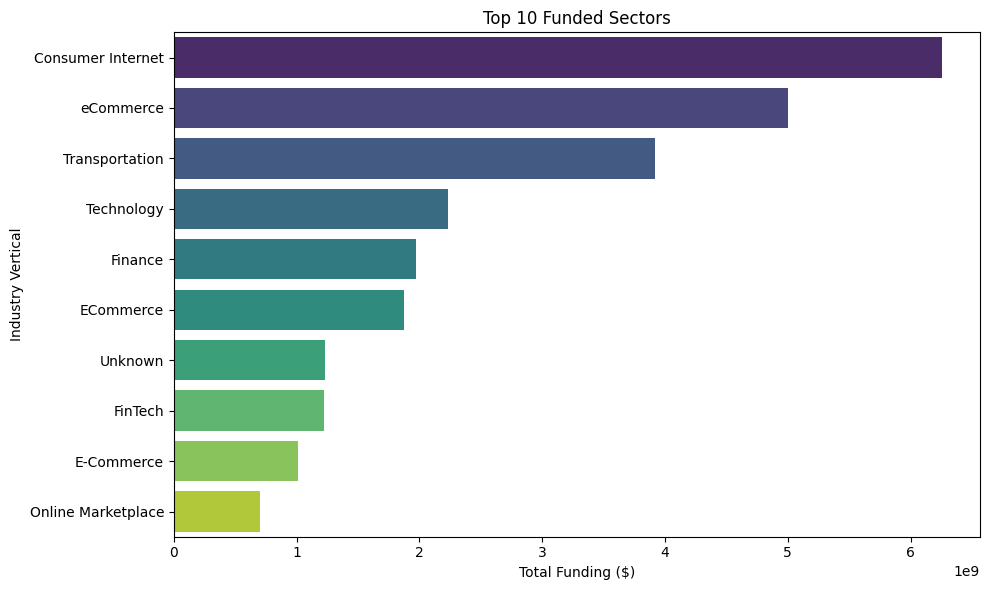

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_sectors = df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette='viridis')
plt.title('Top 10 Funded Sectors')
plt.xlabel('Total Funding ($)')
plt.ylabel('Industry Vertical')
plt.tight_layout()
plt.show()


2. Investment Type Distribution

/tmp/ipython-input-1914798130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='InvestmentnType', order=df['InvestmentnType'].value_counts().index, palette='viridis')


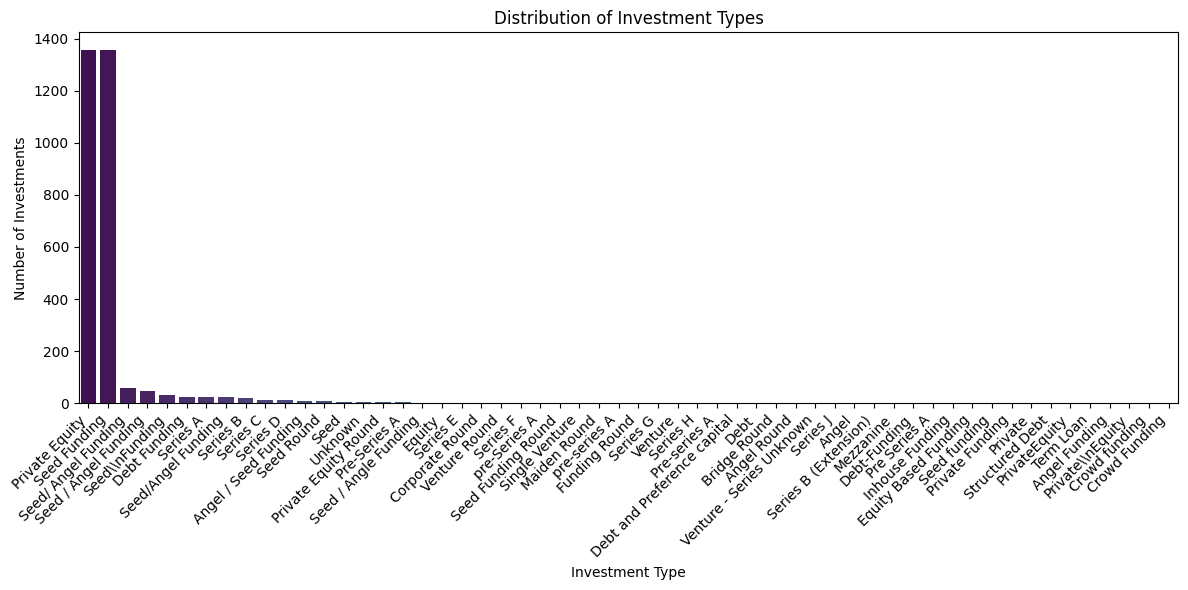

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the plot
sns.countplot(data=df, x='InvestmentnType', order=df['InvestmentnType'].value_counts().index, palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Distribution of Investment Types')
plt.xlabel('Investment Type')
plt.ylabel('Number of Investments')

plt.tight_layout()
plt.show()



3. Funding Distribution by City

/tmp/ipython-input-867203027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


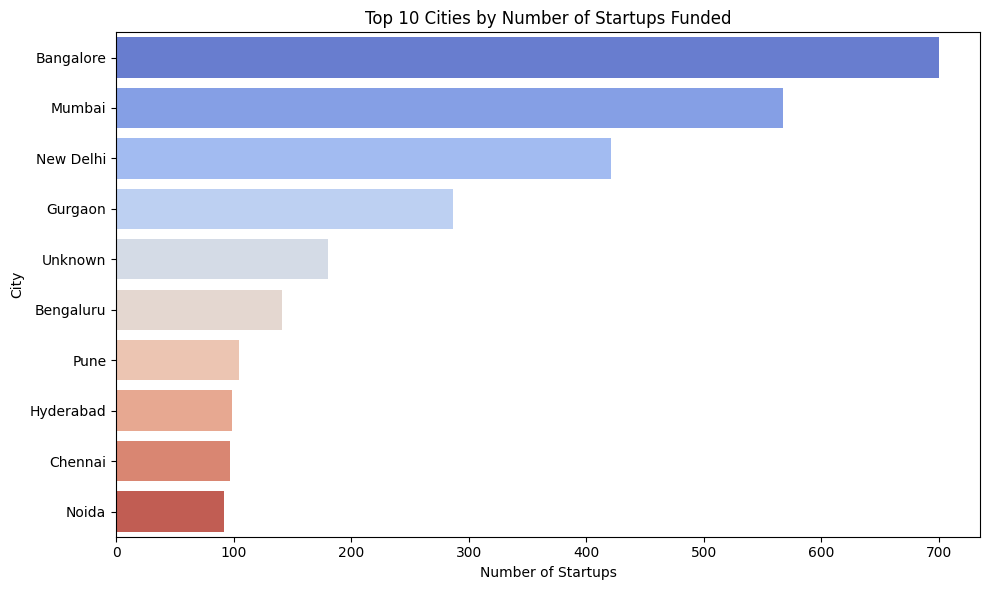

In [ ]:
top_cities = df['City  Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities by Number of Startups Funded')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.tight_layout()
plt.show()


4. Investment Amount Distribution

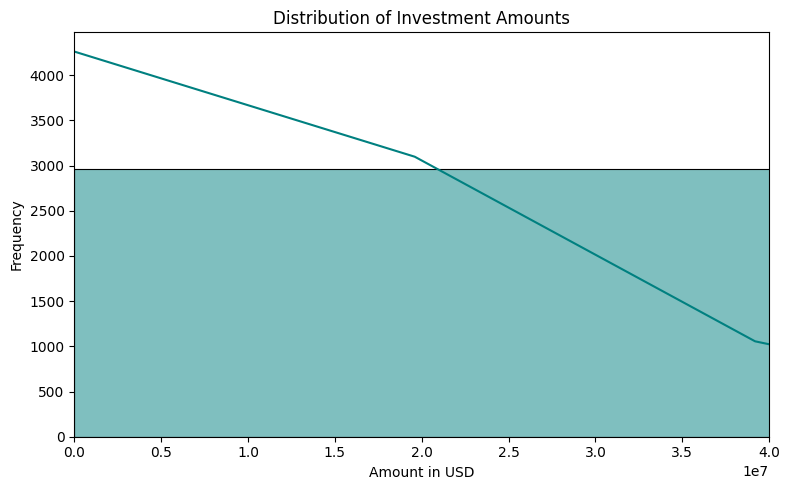

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount in USD'], bins=50, kde=True, color='teal')
plt.title('Distribution of Investment Amounts')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.xlim(0, df['Amount in USD'].quantile(0.95))  # Ignore extreme outliers for better view
plt.tight_layout()
plt.show()


5. Pie Chart of Invest vs Not Invest


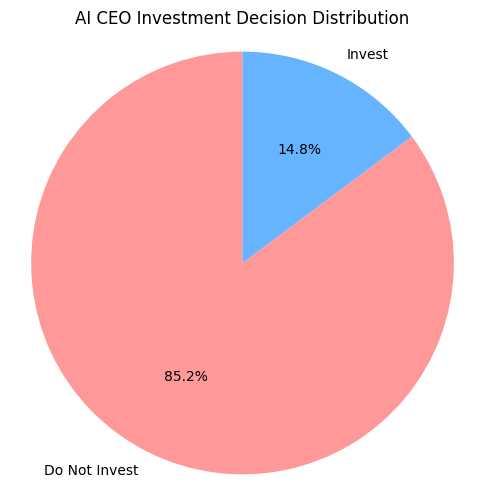

In [ ]:
labels = ['Do Not Invest', 'Invest']
sizes = df['Invest_Decision'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('AI CEO Investment Decision Distribution')
plt.axis('equal')
plt.show()


#Step 4: Encode Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Industry Vertical', 'City  Location', 'InvestmentnType']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future predictions

# Preview encoded data
print("\n--- Encoded Data Preview ---")
print(df.head())


--- Encoded Data Preview ---
   Industry Vertical  City  Location  InvestmentnType  Amount in USD  \
0                171              13               23    200000000.0   
1                727              33               40      8048394.0   
2                172              13               38     18358860.0   
3                234              68               20      3000000.0   
4                229              61               32      1800000.0   

   Invest_Decision  
0                1  
1                1  
2                1  
3                0  
4                1  


#Step 5: Train-Test Split and Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Define features (X) and target (y)
X = df.drop('Invest_Decision', axis=1)
y = df['Invest_Decision']

# 2. Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predict on test data
y_pred = model.predict(X_test)

# 5. Evaluate performance
print("\n--- Model Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))



--- Model Accuracy ---
Accuracy: 0.99

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       777
           1       0.95      1.00      0.98       137

    accuracy                           0.99       914
   macro avg       0.98      1.00      0.99       914
weighted avg       0.99      0.99      0.99       914


--- Confusion Matrix ---
[[770   7]
 [  0 137]]


1. Confusion Matrix Heatmap

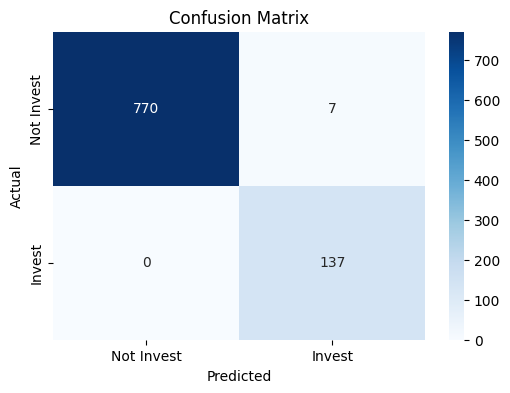

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Invest', 'Invest'], yticklabels=['Not Invest', 'Invest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



2. Feature Importance Plot

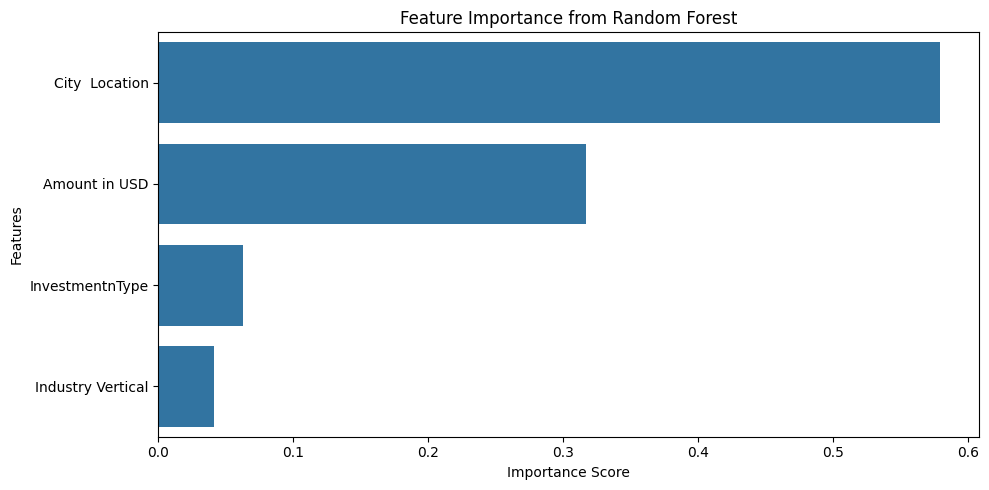

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#Step 6 : Widgets for user input

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Recreate LabelEncoders using original DataFrame BEFORE encoding
original_df = pd.read_csv('/content/startup_funding.csv')
original_df['City  Location'] = original_df['City  Location'].fillna('Unknown').astype(str).str.strip()
original_df['Industry Vertical'] = original_df['Industry Vertical'].fillna('Unknown').astype(str).str.strip()
original_df['InvestmentnType'] = original_df['InvestmentnType'].fillna('Unknown').astype(str).str.strip()

# Create encoders
from sklearn.preprocessing import LabelEncoder

industry_encoder = LabelEncoder()
city_encoder = LabelEncoder()
type_encoder = LabelEncoder()

industry_encoder.fit(original_df['Industry Vertical'])
city_encoder.fit(original_df['City  Location'])
type_encoder.fit(original_df['InvestmentnType'])

# Step 2: Dropdown widgets with actual names
industry_dropdown = widgets.Dropdown(
    options=industry_encoder.classes_,
    description='Industry:',
    layout=widgets.Layout(width='50%')
)

city_dropdown = widgets.Dropdown(
    options=city_encoder.classes_,
    description='City:',
    layout=widgets.Layout(width='50%')
)

type_dropdown = widgets.Dropdown(
    options=type_encoder.classes_,
    description='Investment Type:',
    layout=widgets.Layout(width='50%')
)

amount_slider = widgets.IntSlider(
    value=100000,
    min=0,
    max=10000000,
    step=50000,
    description='Amount ($):',
    layout=widgets.Layout(width='70%')
)

predict_button = widgets.Button(
    description='💡 Ask AI-CEO',
    button_style='success'
)

output = widgets.Output()

# Step 3: Prediction logic
def predict_investment(b):
    with output:
        clear_output()

        # Encode user inputs
        industry_val = industry_encoder.transform([industry_dropdown.value])[0]
        city_val = city_encoder.transform([city_dropdown.value])[0]
        type_val = type_encoder.transform([type_dropdown.value])[0]
        amount_val = amount_slider.value

        # Fix warning by using DataFrame with correct feature names
        input_data = pd.DataFrame([{
            'Industry Vertical': industry_val,
            'City  Location': city_val,
            'InvestmentnType': type_val,
            'Amount in USD': amount_val
        }])

        prediction = model.predict(input_data)[0]

        if prediction == 1:
            print("✅ AI CEO Decision: INVEST")
        else:
            print("❌ AI CEO Decision: DO NOT INVEST")

predict_button.on_click(predict_investment)

# Step 4: Display interface
display(widgets.VBox([
    widgets.HTML("<h3>🚀 AI CEO Investment Predictor</h3>"),
    industry_dropdown,
    city_dropdown,
    type_dropdown,
    amount_slider,
    predict_button,
    output
]))


In [ ]:
import joblib
joblib.dump(model, 'ai_ceo_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']